<a href="https://colab.research.google.com/github/AnushkaMazumdar2/Machine-Learning-Project/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as pl
import matplotlib.patches as mpatches
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

# ML Libraries
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier



In [ ]:
# Evaluation Metrics
import io, os, sys, setuptools
!pip install prophet
import prophet
from yellowbrick.classifier import ClassificationReport
#import fbprophet
#from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [180]:
import csv
df1 = pd.read_csv('/content/Chicago_Crimes_2001_to_2004.csv',error_bad_lines=False)
df2 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)
df3 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv',error_bad_lines=False,engine="python")
#df4 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)
data = pd.concat([df1, df2, df3], ignore_index=False, axis=0)

Skipping line 386448: unexpected end of data


In [130]:
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.000,46.000,06,NaN,NaN,2004.000,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.000,61.000,26,1173974.000,1876757.000,2003.000,04/15/2016 08:55:02 AM,41.817,-87.637,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.000,22.000,20,NaN,NaN,2004.000,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.000,20.000,06,NaN,NaN,2004.000,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.000,49.000,06,1174948.000,1831051.000,2003.000,04/15/2016 08:55:02 AM,41.692,-87.635,"(41.691784636, -87.635115968)"


In [131]:
data.shape

(1194291, 23)

In [132]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1194291 entries, 0 to 386445
Data columns (total 23 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   Unnamed: 0            1194291 non-null  int64  
 1   ID                    1194291 non-null  int64  
 2   Case Number           1194291 non-null  object 
 3   Date                  1194291 non-null  object 
 4   Block                 1194291 non-null  object 
 5   IUCR                  1194290 non-null  object 
 6   Primary Type          1194290 non-null  object 
 7   Description           1194290 non-null  object 
 8   Location Description  1194268 non-null  object 
 9   Arrest                1194290 non-null  object 
 10  Domestic              1194290 non-null  object 
 11  Beat                  1194290 non-null  float64
 12  District              1194249 non-null  float64
 13  Ward                  783439 non-null   float64
 14  Community Area        783144 non-nu

In [ ]:
#data = data.drop(columns=['Unnamed: 0','ID','Case Number'], axis=1)

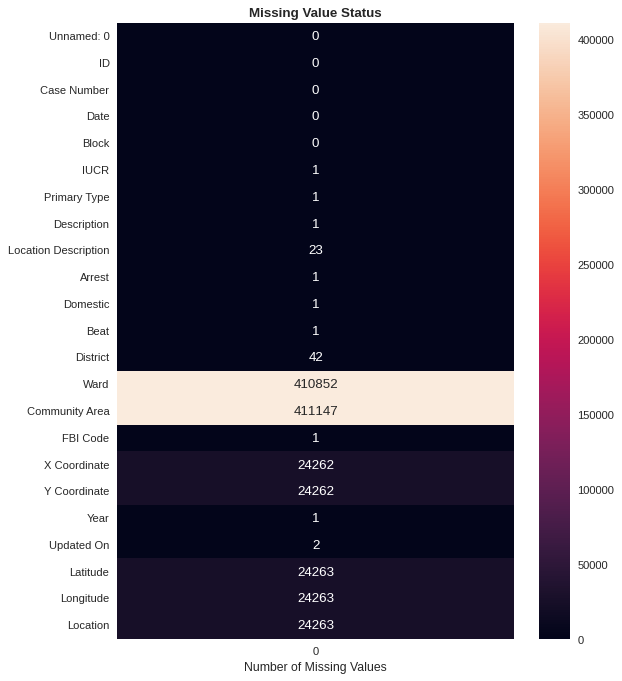

In [133]:
#Plot missing values
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

In [181]:
data = data.dropna()

In [182]:
data = data.drop_duplicates()

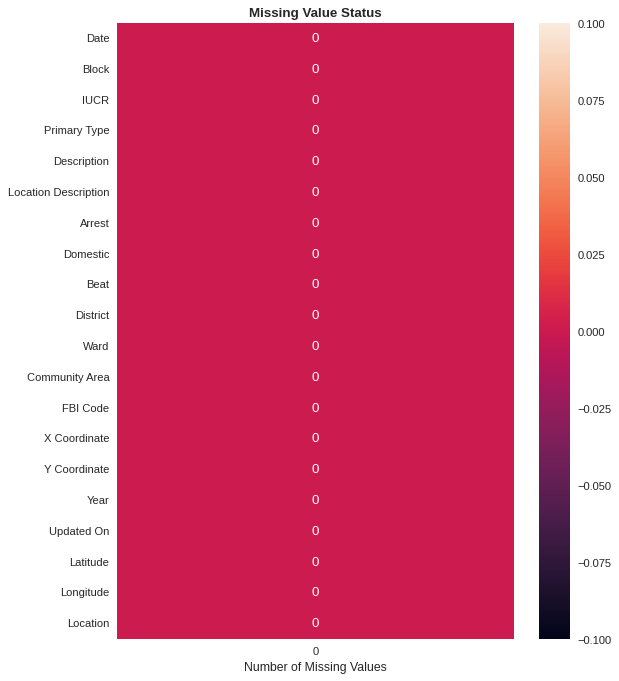

In [ ]:
pl.figure(figsize=(8, 10), dpi=80)
pl.title('Missing Value Status',fontweight='bold')
ax = sns.heatmap(data.isna().sum().to_frame(),annot=True,fmt='d',cmap='rocket')
ax.set_xlabel('Number of Missing Values')
pl.show()

In [ ]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
data.describe()

,Unnamed: 0,ID,Beat,District,Ward,Community Area,X Coordinate,Year,Longitude
count,4060014.000,4060014.000,4060014.000,4060014.000,4060014.000,4060014.000,4060014.000,4060014.000,4060014.000
mean,2919417.110,5167454.368,1206.850,11.321,22.531,37.763,1164480.660,2006.401,-87.672
std,2049135.956,1895736.481,706.143,6.948,13.803,21.580,17154.014,2.783,0.062
min,0.000,634.000,111.000,1.000,1.000,0.000,0.000,2001.000,-91.687
25%,1119175.250,3480593.250,624.000,6.000,10.000,23.000,1152946.000,2004.000,-87.714
50%,2134784.500,5127496.500,1112.000,10.000,22.000,32.000,1165894.000,2006.000,-87.667
75%,4969961.750,6845327.250,1733.000,17.000,34.000,58.000,1176327.000,2009.000,-87.629
max,6254267.000,10600767.000,2535.000,31.000,50.000,77.000,1205119.000,2011.000,-87.525


In [ ]:
data.describe(include='object')

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Y Coordinate,Updated On,Latitude,Location
count,4060014,4060014,4060014,4060014,4060014,4060014,4060014,4060014,4060014.000,4060014,4060014.000,4060014
unique,4059757,1607219,33184,370,29,349,162,26,124533.000,444,561599.000,559529
top,HJ590004,01/01/2007 12:01:00 AM,100XX W OHARE ST,0486,THEFT,SIMPLE,STREET,06,1934241.000,04/15/2016 08:55:02 AM,41.976,"(41.976290414, -87.905227221)"
freq,6,172,11029,334168,821203,452726,1107679,821203,11022.000,2528716,11013.000,11016


In [ ]:
Classes = data['Primary Type'].unique()
Classes

array(['OTHER OFFENSE', 'THEFT', 'CRIM SEXUAL ASSAULT',
       'OFFENSE INVOLVING CHILDREN', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'CRIMINAL DAMAGE', 'CRIMINAL TRESPASS',
       'HOMICIDE', 'ROBBERY', 'BATTERY', 'ARSON', 'BURGLARY', 'ASSAULT',
       'NARCOTICS', 'PUBLIC PEACE VIOLATION',
       'INTERFERENCE WITH PUBLIC OFFICER', 'GAMBLING', 'KIDNAPPING',
       'WEAPONS VIOLATION', 'PROSTITUTION', 'INTIMIDATION',
       'LIQUOR LAW VIOLATION', 'STALKING', 'OBSCENITY',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'RITUALISM'],
      dtype=object)

In [ ]:
data.Date = pd.to_datetime(data.Date, format='%m/%d/%Y %I:%M:%S %p')
data.index = pd.DatetimeIndex(data.Date)

In [ ]:
data['date2'] = pd.to_datetime(data['Date'])
data['Year'] = data['date2'].dt.year
data['Month'] = data['date2'].dt.month
data['Day'] = data['date2'].dt.day
data['Hour'] = data['date2'].dt.hour
data['Minute'] = data['date2'].dt.minute
data['Second'] = data['date2'].dt.second
data = data.drop(['date2'], axis=1)
data = data.drop(['Updated On'], axis=1)
data.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
Date,,,,,,,,,,,,,,,,,,,,,
2003-03-01 00:00:00,2544,4676906,HM278933,2003-03-01 00:00:00,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,1876757.000,2003,41.817,-87.637,"(41.817229156, -87.637328162)",3,1,0,0,0
2003-05-01 01:00:00,3302,4677901,HM275615,2003-05-01 01:00:00,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,1831051.000,2003,41.692,-87.635,"(41.691784636, -87.635115968)",5,1,1,0,0
2001-01-01 11:00:00,3756,4791194,HM403711,2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,0266,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,...,1829375.000,2001,41.687,-87.608,"(41.687020002, -87.60844523)",1,1,11,0,0
2003-03-15 00:00:00,4502,4679521,HM216293,2003-03-15 00:00:00,090XX S RACINE AVE,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,...,1844832.000,2003,41.730,-87.653,"(41.729712374, -87.653158513)",3,15,0,0,0
2003-01-01 00:00:00,4904,4680124,HM282389,2003-01-01 00:00:00,009XX S SPAULDING AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,1895755.000,2003,41.870,-87.708,"(41.869772159, -87.708180162)",1,1,0,0,0


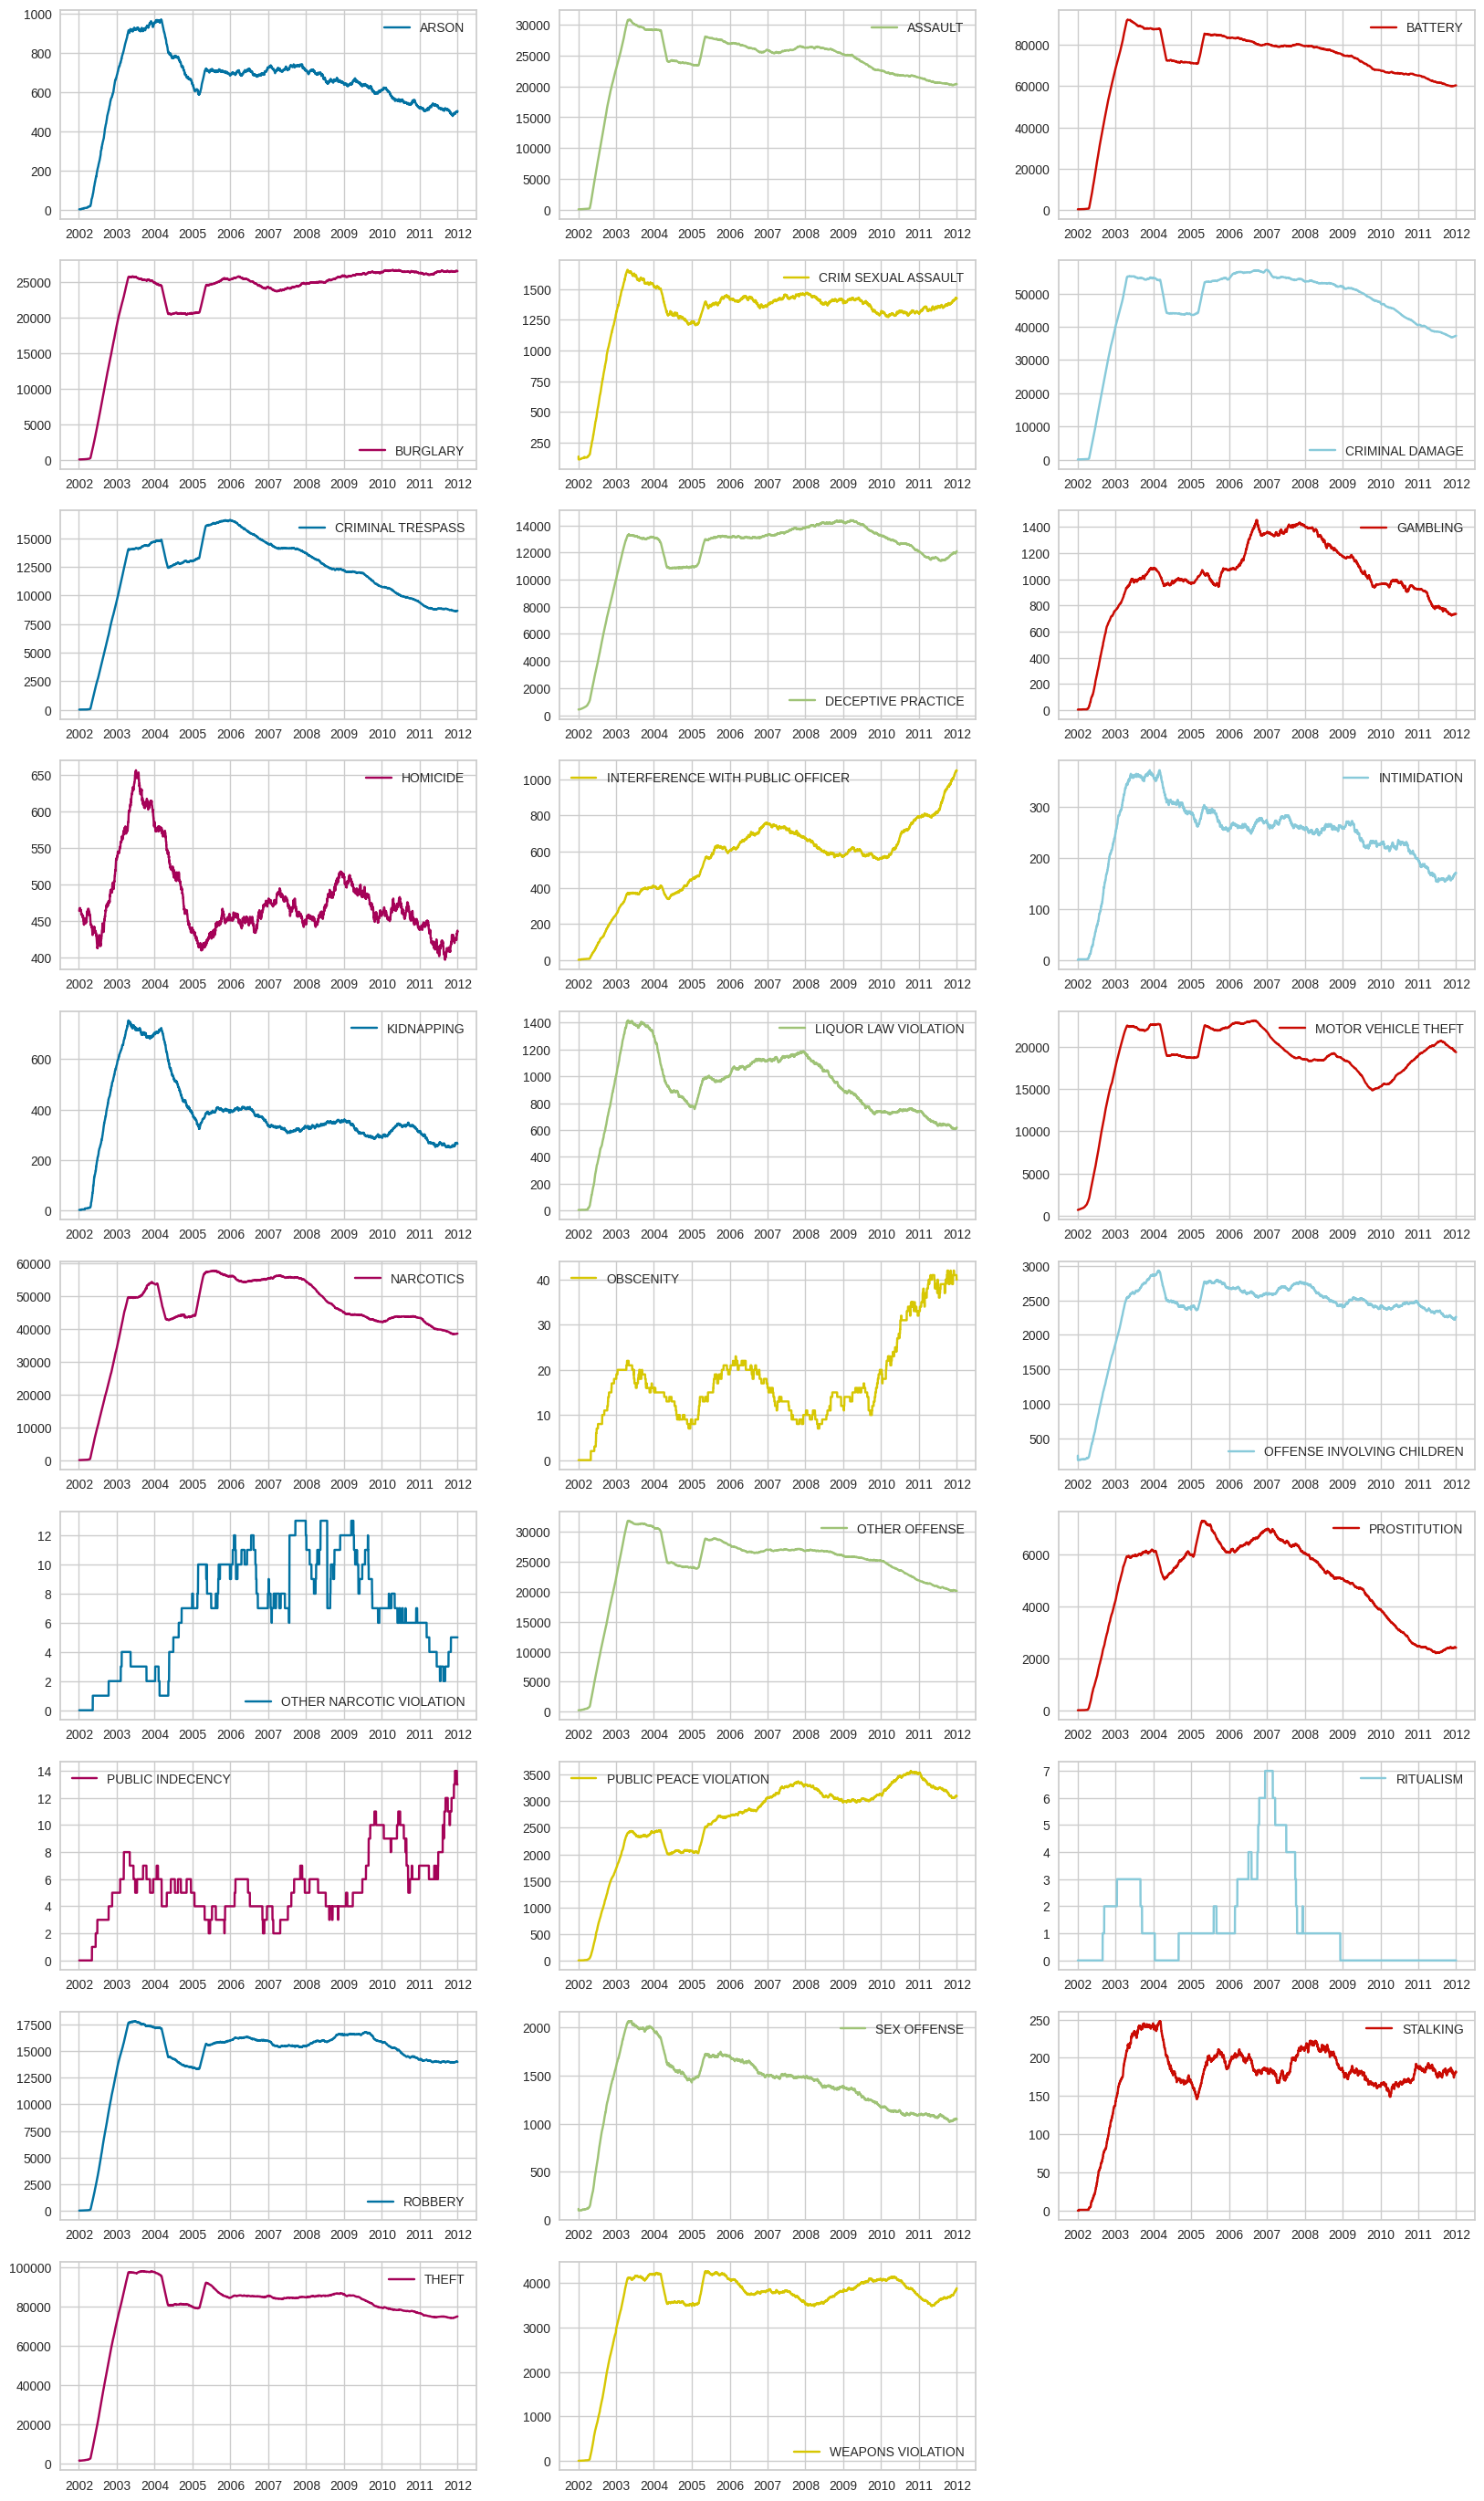

In [ ]:
crimes_count_date = data.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=data.index.date, fill_value=0)
crimes_count_date.index = pd.DatetimeIndex(crimes_count_date.index)
plo = crimes_count_date.rolling(365).sum().plot(figsize=(20, 35), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

In [ ]:
#drop duplicates attributes
data = data.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate','Y Coordinate','Location'], axis=1)

In [ ]:
#eliminate none criminal crimes
data.drop(data.index [data[ 'Primary Type' ] == 'PUBLIC INDECENCY' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON-CRIMINAL (SUBJECT SPECIFIED)' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON-CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'NON - CRIMINAL' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'OBSCENITY' ] , inplace = True)
data.drop(data.index [data[ 'Primary Type' ] == 'CONCEALED CARRY LICENSE VIOLATION' ] , inplace = True)

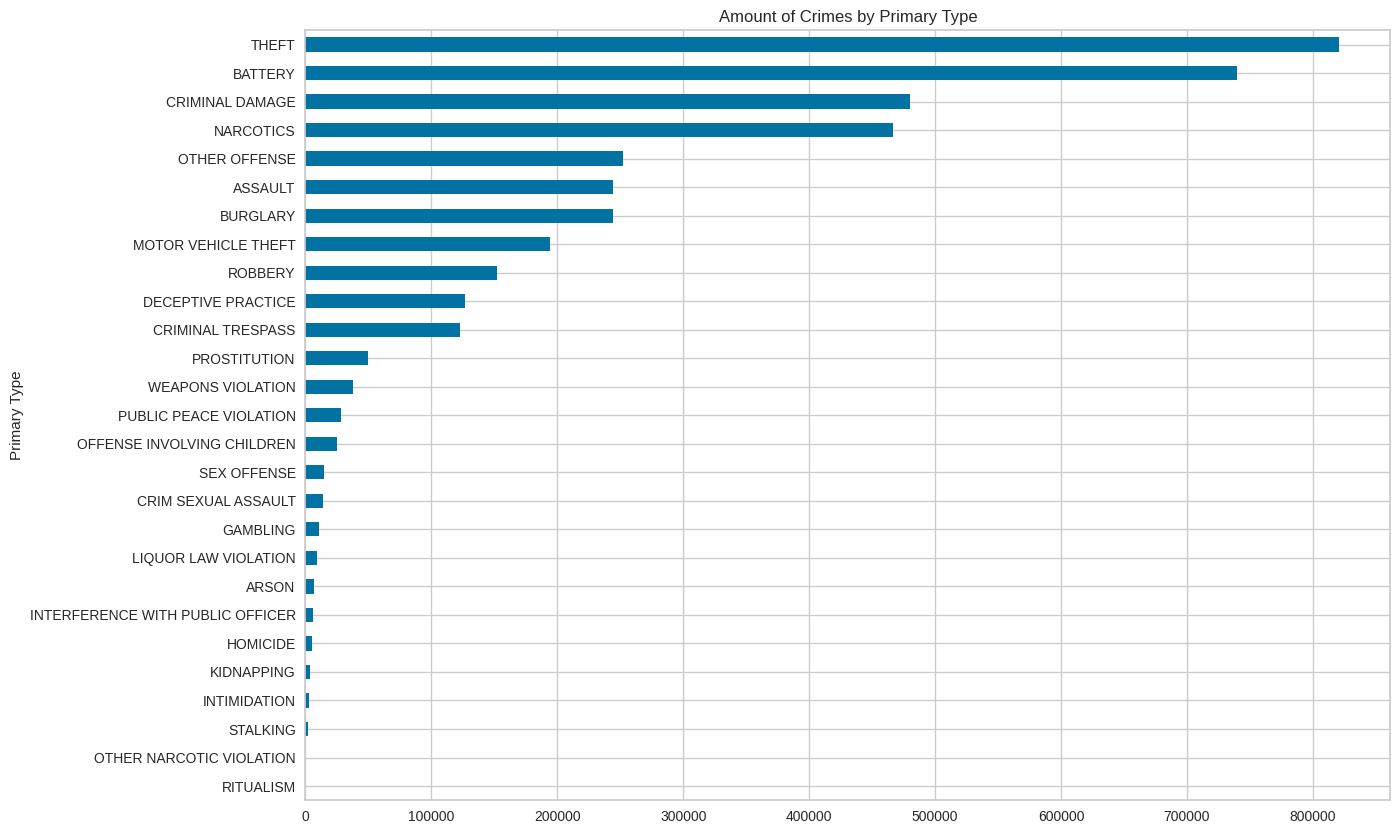

In [ ]:
pl.figure(figsize=(14,10))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Crime Type')
pl.xlabel('Amount of Crimes')
data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

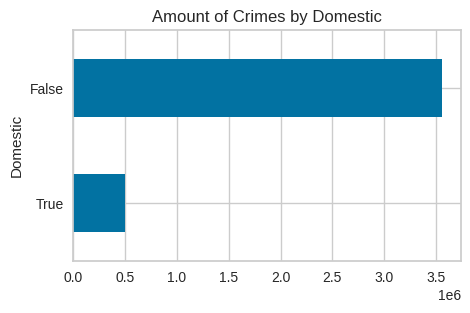

In [ ]:
pl.figure(figsize=(5,3))
pl.title('Amount of Crimes by Domestic')
pl.ylabel('Domestic')
pl.xlabel('Amount of Crimes')
data.groupby([data['Domestic']]).size().sort_values(ascending=True).plot(kind='barh')
pl.show()

<Axes: xlabel='count', ylabel='Location Description'>

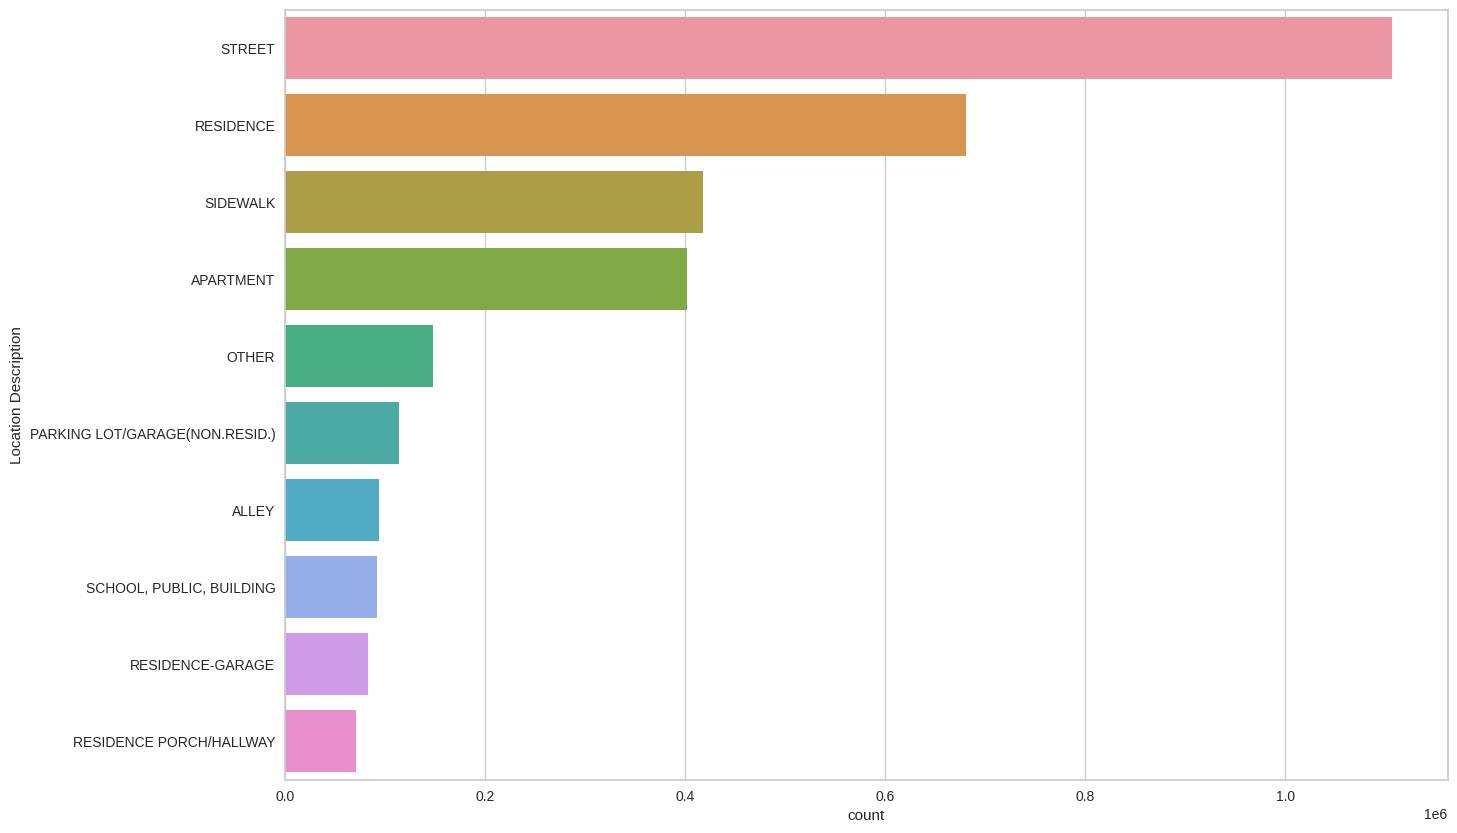

In [ ]:
pl.figure(figsize = (15, 10))
sns.countplot(y= 'Location Description', data = data, order = data['Location Description'].value_counts().iloc[:10].index)

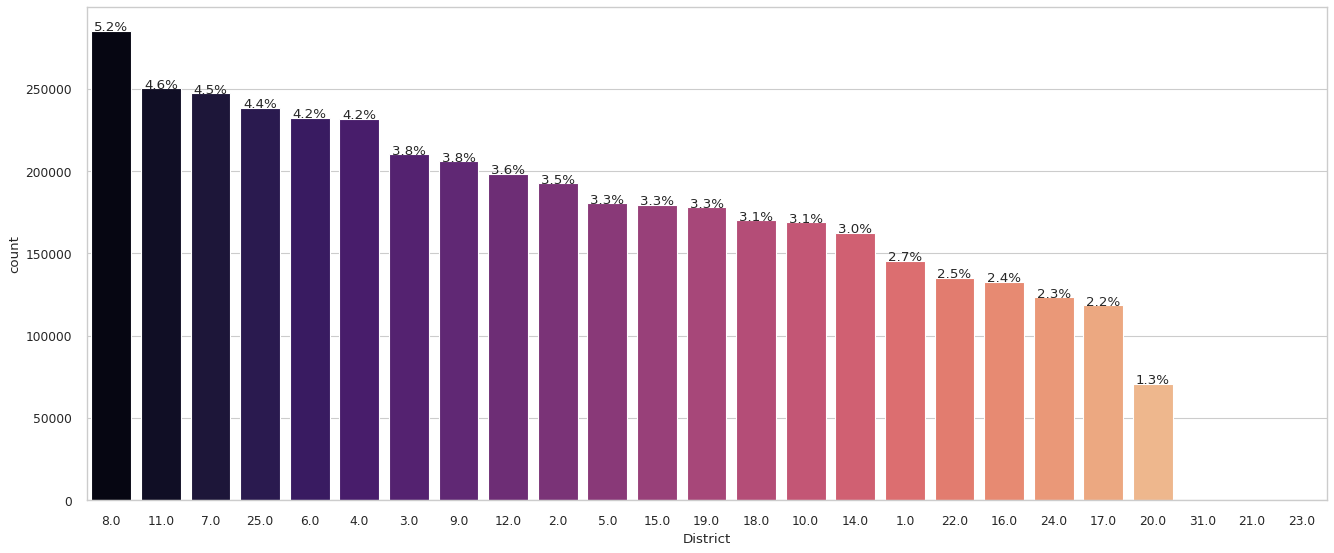

In [ ]:
pl.figure(figsize=(20, 8), dpi=80)
sns.set_theme(style="whitegrid")
sns.countplot(x="District", palette='magma', data=data , dodge=True , order = data['District'].value_counts().index )
order1 = data['District'].value_counts().to_list()
for i in range(22):
    count = order1[i]
    strt='{:.01f}%'.format(count*100/5478378)
    pl.text(i,count,strt,ha='center', zorder=10)
pl.show()

In [ ]:
# Convert Categorical Attributes to Numerical
data['Block'] = pd.factorize(data["Block"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['Location Description'] = pd.factorize(data["Location Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]


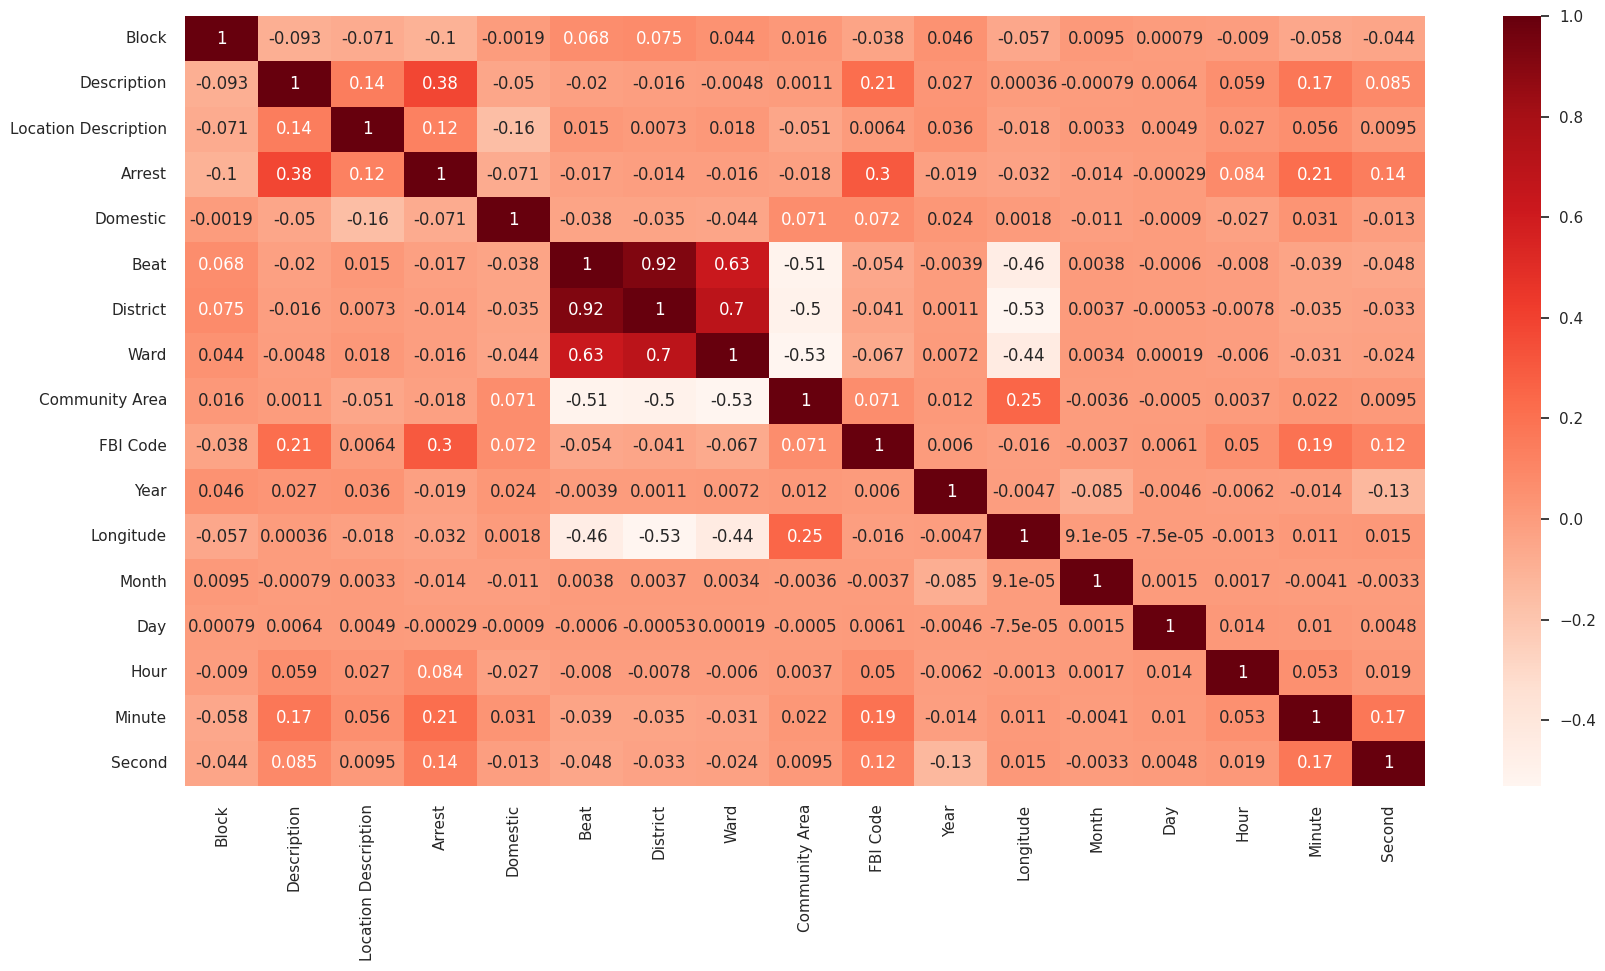

In [ ]:
#Using Pearson Correlation
pl.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=pl.cm.Reds)
pl.show()

In [ ]:
import folium

In [226]:
chicago_map = folium.Map(location=[41.864073,-87.706819],
                        zoom_start=11,
                        tiles="CartoDB dark_matter")

In [227]:
locations = data.groupby('Community Area').first()

In [228]:
new_locations = locations.loc[:, ['Latitude', 'Longitude', 'Location Description', 'Arrest']]

In [229]:
for i in range(len(new_locations)):
    lat = new_locations.iloc[i][0]
    long = new_locations.iloc[i][1]
    popup_text = """Community Index : {}<br>
                Arrest : {}<br>
                Location Description : {}<br>"""
    popup_text = popup_text.format(new_locations.index[i],
                               new_locations.iloc[i][-1],
                               new_locations.iloc[i][-2]
                               )
    folium.CircleMarker(location = [lat, long], popup= popup_text, fill = True).add_to(chicago_map)

In [213]:
from streamlit_folium import st_folium

In [215]:
st_data = st_folium(chicago_map,width=725)

In [219]:
from IPython.core.display import display,HTML

In [224]:
def folium_deepnote_show(m):
  a = m.get_root().render()
  data_fixed_height = a.replace('width: 100%;height: 100%','width: 100%').replace('height: 100%;','height: 609px;')
  display(HTML(data_fixed_height))

In [230]:
folium_deepnote_show(chicago_map)

In [231]:
chicago_map

In [137]:
# As the dataset is too huge is size, we would just subsampled a dataset for modelling as proof of concept
data = data.sample(n=100000)

In [138]:
# Remove irrelevant/not meaningfull attributes
data = data.drop(columns= ['Unnamed: 0','ID','Case Number'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 193084 to 197863
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Date                  100000 non-null  object 
 1   Block                 100000 non-null  object 
 2   IUCR                  100000 non-null  object 
 3   Primary Type          100000 non-null  object 
 4   Description           100000 non-null  object 
 5   Location Description  100000 non-null  object 
 6   Arrest                100000 non-null  object 
 7   Domestic              100000 non-null  object 
 8   Beat                  100000 non-null  float64
 9   District              100000 non-null  float64
 10  Ward                  100000 non-null  float64
 11  Community Area        100000 non-null  float64
 12  FBI Code              100000 non-null  object 
 13  X Coordinate          100000 non-null  float64
 14  Y Coordinate          100000 non-null  float64


In [139]:
# Splitting the Date to Day, Month, Year, Hour, Minute, Second
data['date2'] = pd.to_datetime(data['Date'])
data['Year'] = data['date2'].dt.year
data['Month'] = data['date2'].dt.month
data['Day'] = data['date2'].dt.day
data['Hour'] = data['date2'].dt.hour
data['Minute'] = data['date2'].dt.minute
data['Second'] = data['date2'].dt.second
data = data.drop(['Date'], axis=1)
data = data.drop(['date2'], axis=1)
data = data.drop(['Updated On'], axis=1)
data.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
193084,099XX S HALSTED ST,143A,WEAPONS VIOLATION,UNLAWFUL POSS OF HANDGUN,STREET,True,False,2232.000,22.000,34.000,...,1839039.000,2008,41.714,-87.643,"(41.713753878, -87.642987258)",6,15,2,15,16
216381,060XX S BISHOP ST,2017,NARCOTICS,MANU/DELIVER:CRACK,STREET,True,False,713.000,7.000,16.000,...,1864654.000,2006,41.784,-87.661,"(41.784154287, -87.66069029)",8,17,13,10,0
211336,084XX S MORGAN ST,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,613.000,6.000,21.000,...,1848802.000,2006,41.741,-87.649,"(41.740580282, -87.648610242)",9,23,22,0,0
152735,100XX W OHARE ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,AIRPORT/AIRCRAFT,False,False,1651.000,16.000,41.000,...,1934241.000,2006,41.976,-87.905,"(41.976290414, -87.905227221)",8,4,18,20,0
93043,015XX N LOCKWOOD AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,2532.000,25.000,37.000,...,1909629.000,2008,41.908,-87.758,"(41.908108222, -87.758400475)",1,5,5,20,59


In [151]:
# Convert Categorical Attributes to Numerical
data['Block'] = pd.factorize(data["Block"])[0]
data['IUCR'] = pd.factorize(data["IUCR"])[0]
data['Description'] = pd.factorize(data["Description"])[0]
data['Location Description'] = pd.factorize(data["Location Description"])[0]
data['FBI Code'] = pd.factorize(data["FBI Code"])[0]
data['Location'] = pd.factorize(data["Location"])[0]

In [152]:
# At previous plot, we could see that the classes is quite imbalance
# Therefore, we are going to group several less occured Crime Type into 'Others' to reduce the Target Class amount

# First, we sum up the amount of Crime Type happened and select the last 13 classes
all_classes = data.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
3,3,12470
1,1,11846
2,2,6215
11,11,6079
4,4,5710
7,7,4605
10,10,3722
12,12,3090
8,8,3013
9,9,2389


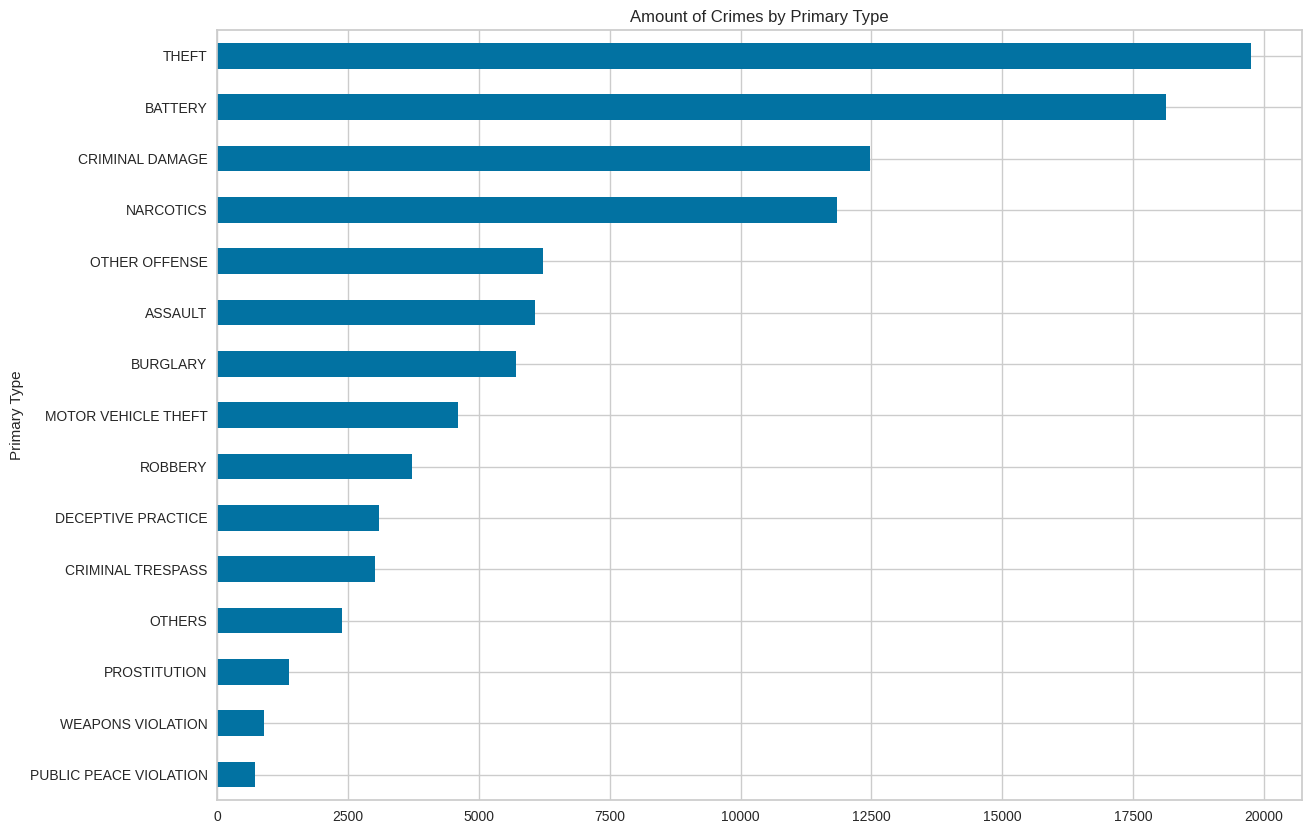

In [144]:
# After that, we replaced it with label 'OTHERS'
data.loc[data['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar Chart visualize Primary Types
pl.figure(figsize=(14,10))
pl.title('Amount of Crimes by Primary Type')
pl.ylabel('Crime Type')
pl.xlabel('Amount of Crimes')

data.groupby([data['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

pl.show()

In [145]:
# Now we are left with 14 Class as our predictive class
Classes = data['Primary Type'].unique()
Classes

array(['WEAPONS VIOLATION', 'NARCOTICS', 'OTHER OFFENSE',
       'CRIMINAL DAMAGE', 'BURGLARY', 'BATTERY', 'THEFT',
       'MOTOR VEHICLE THEFT', 'CRIMINAL TRESPASS', 'OTHERS', 'ROBBERY',
       'ASSAULT', 'DECEPTIVE PRACTICE', 'PROSTITUTION',
       'PUBLIC PEACE VIOLATION'], dtype=object)

In [146]:
#Encode target labels into categorical variables:
data['Primary Type'] = pd.factorize(data["Primary Type"])[0]
data['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

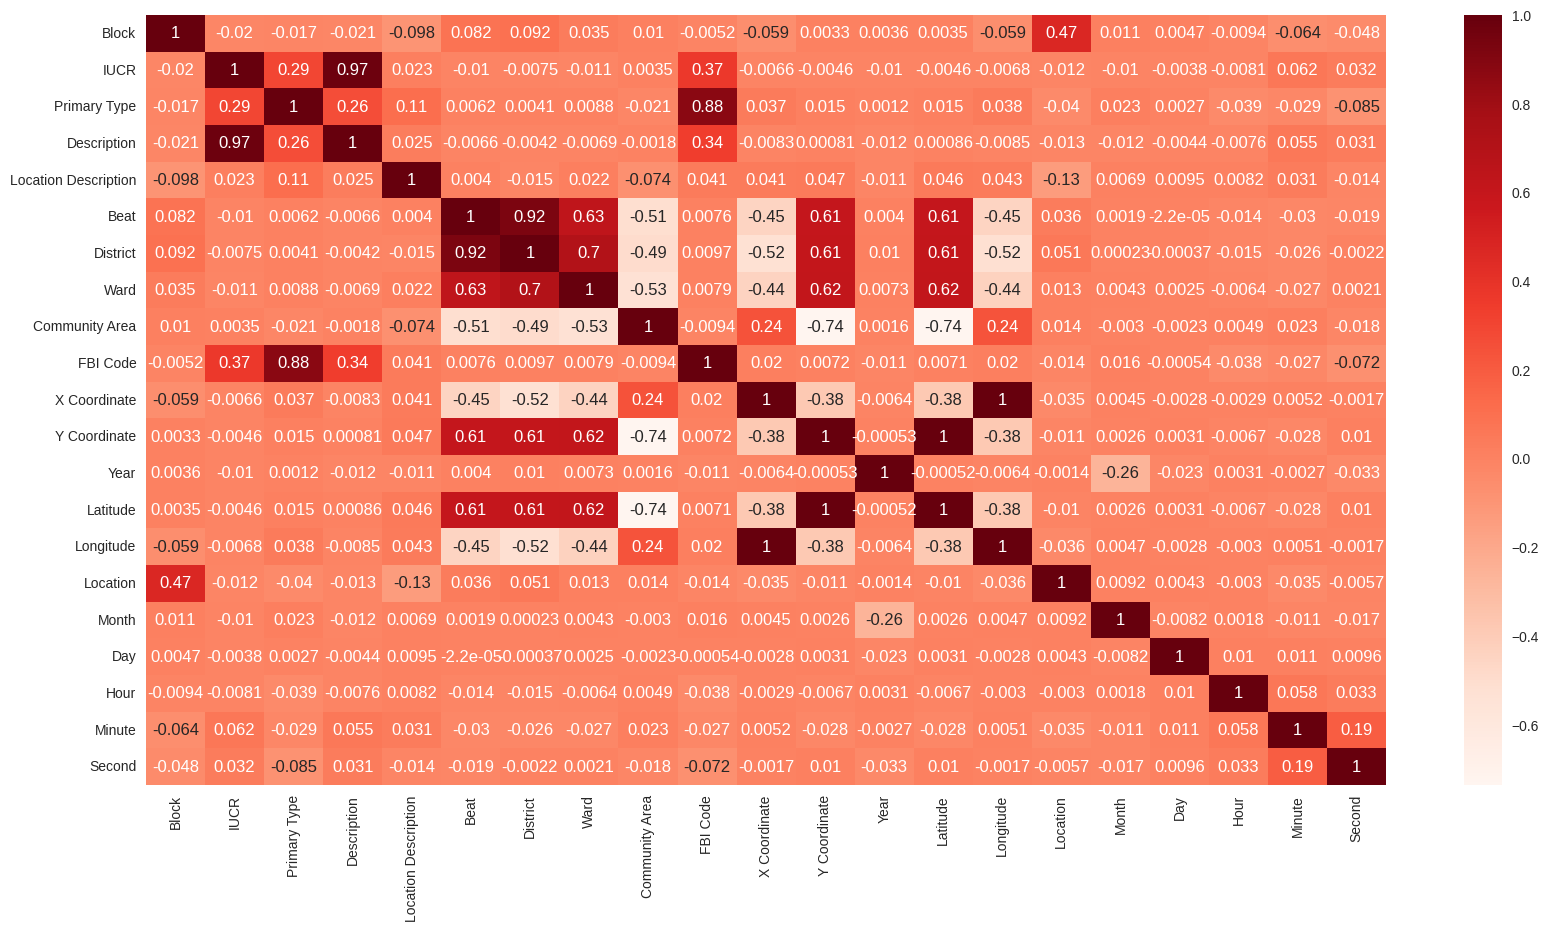

In [153]:
# Feature Selection using Filter Method
#Using Pearson Correlation
pl.figure(figsize=(20,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=pl.cm.Reds)
pl.show()

In [154]:
# Feature Selection using Filter Method
# Split Dataframe to target class and features
X_fs = data.drop(columns= ['Primary Type'], axis=1)
Y_fs = data['Primary Type']

In [155]:
#Correlation with output variable
cor_target = abs(cor['Primary Type'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.2]
relevant_features

IUCR           0.295
Primary Type   1.000
Description    0.264
FBI Code       0.876
Name: Primary Type, dtype: float64

In [156]:
# At Current Point, the attributes is select manually based on Feature Selection Part.
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [157]:
Target = 'Primary Type'

In [158]:
#Split dataset to Training Set & Test Set
x, y = train_test_split(data,
                        test_size = 0.2,
                        train_size = 0.8,
                        random_state= 3)

x1 = x[Features]    #Features to train
x2 = x[Target]      #Target Class to train
y1 = y[Features]    #Features to test
y2 = y[Target]      #Target Class to test

print('Feature Set Used    : ', Features)
print('Target Class        : ', Target)
print('Training Set Size   : ', x.shape)
print('Test Set Size       : ', y.shape)

Feature Set Used    :  ['IUCR', 'Description', 'FBI Code']
Target Class        :  Primary Type
Training Set Size   :  (80000, 23)
Test Set Size       :  (20000, 23)


In [159]:
x1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 80000 entries, 128087 to 301823
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   IUCR         80000 non-null  int64
 1   Description  80000 non-null  int64
 2   FBI Code     80000 non-null  int64
dtypes: int64(3)
memory usage: 2.4 MB


In [160]:
# Random Forest
# Create Model with configuration
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True,
                                  max_depth = 50,
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,y=x2)

# Prediction
result = rf_model.predict(y[Features])

========== Random Forest Results ==========
Accuracy    :  0.99735
Recall      :  0.99735
Precision   :  0.9973732603509934
F1 Score    :  0.99735
Confusion Matrix: 


<Axes: >

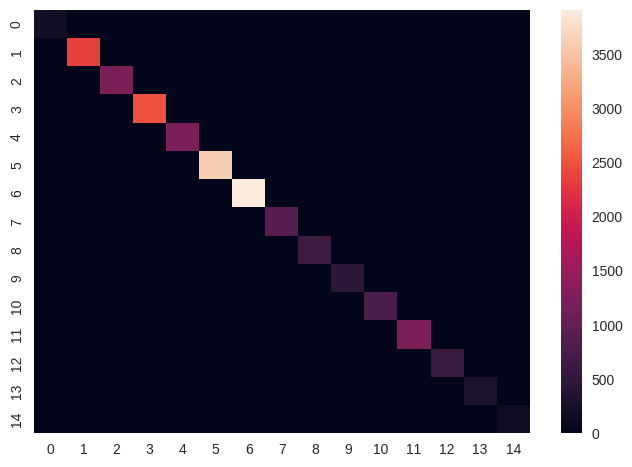

In [161]:
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Random Forest Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
sns.heatmap(confusion_m)

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       1.00      1.00      1.00      2360
         OTHER OFFENSE       0.99      1.00      1.00      1226
       CRIMINAL DAMAGE       1.00      1.00      1.00      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       1.00      1.00      1.00      3602
                 THEFT       1.00      1.00      1.00      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.97      0.94      0.96       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       0.99      1.00      0.99      1227
    DECEPTIVE PRACTICE       1.00      0.98      0.99       605
          PROSTITUTION       1.00      0.98 

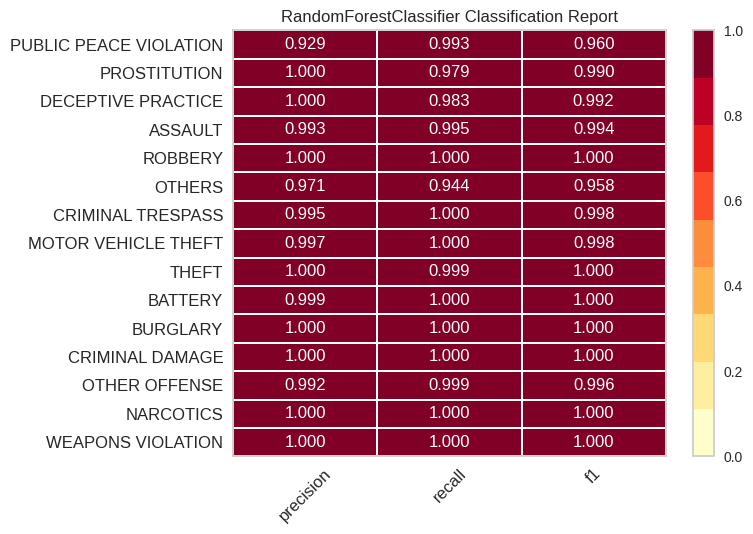

In [162]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

In [163]:
# Neural Network
# Create Model with configuration
nn_model = MLPClassifier(solver='adam',
                         alpha=1e-5,
                         hidden_layer_sizes=(40,),
                         random_state=1,
                         max_iter=1000
                        )

# Model Training
nn_model.fit(X=x1,
             y=x2)

# Prediction
result = nn_model.predict(y[Features])

In [177]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== Neural Network Results ==========
Accuracy    :  0.9722
Recall      :  0.9722
Precision   :  0.9718429393332312
F1 Score    :  0.9722
Confusion Matrix: 
[[ 192    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 2349   11    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0   94 1121    0    0    1    0    0    0   10    0    0    0    0
     0]
 [   0    0   25 2473    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1206    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0   18    0 3502   82    0    0    0    0    0    0    0
     0]
 [   0    0    0    9    0   18 3883    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0    0    0  878    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  622    0    0    0    0    0
     0]
 [   0   27   33    0    0    6    0    0    0  341    0   24   36    0
     1]
 [   0    0    0    0    0    0    0

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       0.95      1.00      0.97      2360
         OTHER OFFENSE       0.90      0.91      0.91      1226
       CRIMINAL DAMAGE       0.99      0.99      0.99      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       0.99      0.97      0.98      3602
                 THEFT       0.98      0.99      0.99      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.78      0.73      0.75       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       0.98      0.99      0.98      1227
    DECEPTIVE PRACTICE       0.91      0.89      0.90       605
          PROSTITUTION       1.00      0.98 

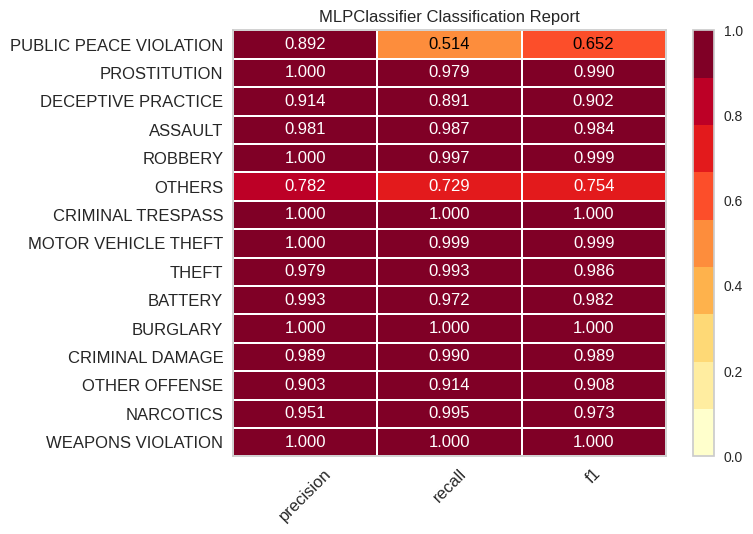

In [178]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

In [179]:
# K-Nearest Neighbors
# Create Model with configuration
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1,
             y=x2)

# Prediction
result = knn_model.predict(y[Features])

In [183]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors Results ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

========== K-Nearest Neighbors Results ==========
Accuracy    :  0.99955
Recall      :  0.99955
Precision   :  0.9995521247670389
F1 Score    :  0.99955
Confusion Matrix: 
[[ 192    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 2359    0    1    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    1 1225    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 2498    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1206    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0 3600    0    0    0    2    0    0    0    0
     0]
 [   0    0    0    0    0    0 3910    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0  878    0    1    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  622    0    0    0    0    0
     0]
 [   0    0    0    0    0    1    0    0    0  467    0    0    0    0
     0]
 [   0    0    0    0    0  

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       1.00      1.00      1.00      2360
         OTHER OFFENSE       1.00      1.00      1.00      1226
       CRIMINAL DAMAGE       1.00      1.00      1.00      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       1.00      1.00      1.00      3602
                 THEFT       1.00      1.00      1.00      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.99      1.00      0.99       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       1.00      1.00      1.00      1227
    DECEPTIVE PRACTICE       1.00      1.00      1.00       605
          PROSTITUTION       1.00      1.00 

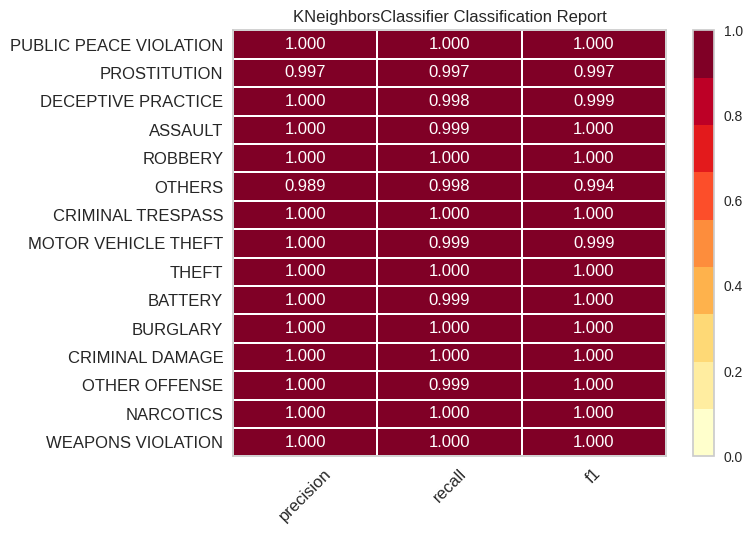

In [184]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [185]:
# Ensemble Voting Model
# Combine 3 Models to create an Ensemble Model

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), ('rf', rf_model), ('nn', nn_model)],
                         weights=[1,1,1],
                         flatten_transform=True)
eclf1 = eclf1.fit(X=x1, y=x2)

# Prediction
result = eclf1.predict(y[Features])

In [186]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting Results =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: ")
print(confusion_m)

============= Ensemble Voting Results =============
Accuracy    :  0.9979
Recall      :  0.9979
Precision   :  0.9979205561825436
F1 Score    :  0.9979
Confusion Matrix: 
[[ 192    0    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0 2360    0    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0 1226    0    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0 2498    0    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0 1206    0    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0 3602    0    0    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    3 3907    0    0    0    0    0    0    0
     0]
 [   0    0    0    1    0    0    0  878    0    0    0    0    0    0
     0]
 [   0    0    0    0    0    0    0    0  622    0    0    0    0    0
     0]
 [   0    4    7    0    0    4    0    0    0  453    0    0    0    0
     0]
 [   0    0    0    0    0   

================= Classification Report =================

                        precision    recall  f1-score   support

     WEAPONS VIOLATION       1.00      1.00      1.00       192
             NARCOTICS       1.00      1.00      1.00      2360
         OTHER OFFENSE       0.99      1.00      0.99      1226
       CRIMINAL DAMAGE       1.00      1.00      1.00      2498
              BURGLARY       1.00      1.00      1.00      1206
               BATTERY       1.00      1.00      1.00      3602
                 THEFT       1.00      1.00      1.00      3910
   MOTOR VEHICLE THEFT       1.00      1.00      1.00       879
     CRIMINAL TRESPASS       1.00      1.00      1.00       622
                OTHERS       0.98      0.97      0.97       468
               ROBBERY       1.00      1.00      1.00       769
               ASSAULT       1.00      1.00      1.00      1227
    DECEPTIVE PRACTICE       1.00      0.98      0.99       605
          PROSTITUTION       1.00      0.98 

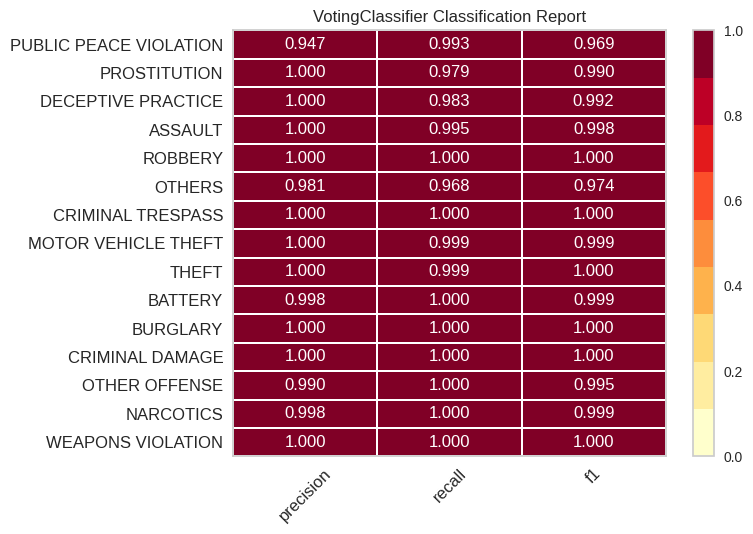

In [187]:
# Classification Report
# Instantiate the classification model and visualizer
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Classification Report =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()

In [190]:
#Drop the columns that we are not going to use from the dataset
chicago_data = data.drop(['Unnamed: 0','ID','Case Number','IUCR','X Coordinate', 'Y Coordinate', 'Latitude',
       'Longitude','Location','FBI Code','Ward','Year','Community Area','District','Beat'],axis=1)

In [191]:
chicago_data.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Updated On
1,03/01/2003 12:00:00 AM,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,04/15/2016 08:55:02 AM
4,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,04/15/2016 08:55:02 AM
6,01/01/2001 11:00:00 AM,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,08/29/2006 03:46:28 AM
7,03/15/2003 12:00:00 AM,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,04/15/2016 08:55:02 AM
9,01/01/2003 12:00:00 AM,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,04/15/2016 08:55:02 AM


In [192]:
chicago_data['Date'] = pd.to_datetime(chicago_data.Date,format = '%m/%d/%Y %I:%M:%S %p')

In [193]:
chicago_data.set_index('Date',inplace=True)

In [194]:
chicago_data.head()

,Block,Primary Type,Description,Location Description,Arrest,Domestic,Updated On
Date,,,,,,,
2003-03-01 00:00:00,004XX W 42ND PL,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,True,04/15/2016 08:55:02 AM
2003-05-01 01:00:00,111XX S NORMAL AVE,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,False,04/15/2016 08:55:02 AM
2001-01-01 11:00:00,114XX S ST LAWRENCE AVE,CRIM SEXUAL ASSAULT,PREDATORY,RESIDENCE,True,True,08/29/2006 03:46:28 AM
2003-03-15 00:00:00,090XX S RACINE AVE,OTHER OFFENSE,OTHER WEAPONS VIOLATION,RESIDENCE PORCH/HALLWAY,False,False,04/15/2016 08:55:02 AM
2003-01-01 00:00:00,009XX S SPAULDING AVE,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,False,04/15/2016 08:55:02 AM


In [195]:
temp = chicago_data.resample('Y').size()
temp

Date
2001-12-31      1409
2002-12-31       391
2003-12-31       116
2004-12-31         3
2005-12-31       700
2006-12-31    339671
2007-12-31     50309
2008-12-31    371204
2009-12-31       413
2010-12-31       177
2011-12-31       198
Freq: A-DEC, dtype: int64

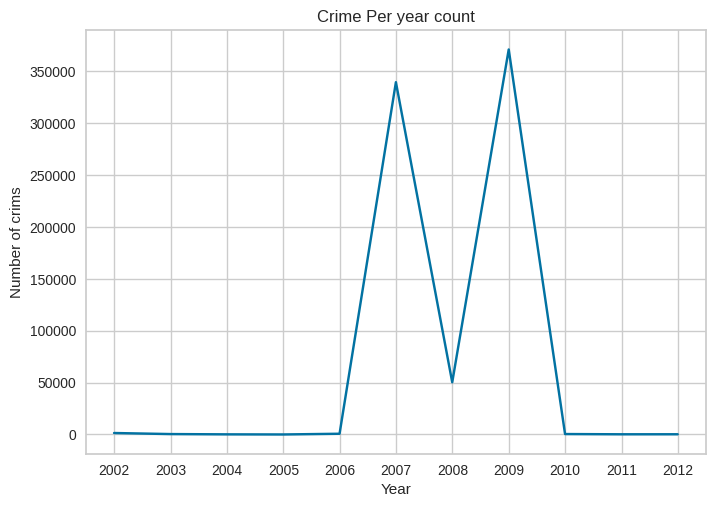

In [196]:
pl.plot(temp)
pl.title('Crime Per year count')
pl.xlabel('Year')
pl.ylabel('Number of crims')
pl.show()

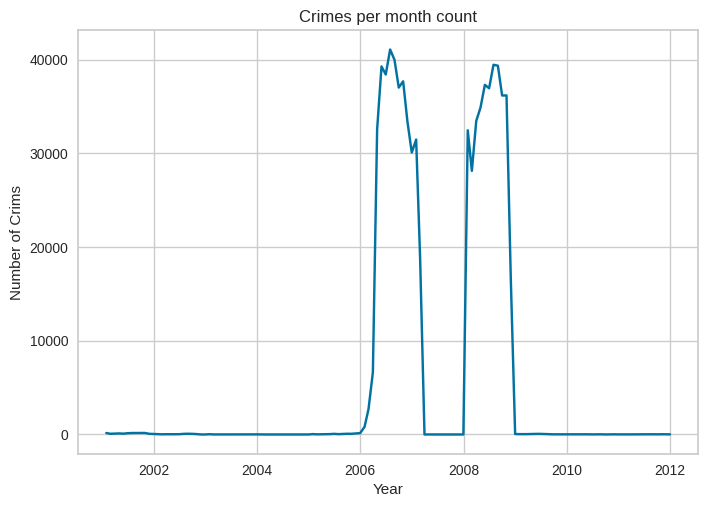

In [197]:
pl.plot(chicago_data.resample('M').size())
pl.title('Crimes per month count')
pl.xlabel('Year')
pl.ylabel('Number of Crims')
pl.show()

In [198]:
chicago_prohet = chicago_data.resample('M').size().reset_index()
chicago_prohet

,Date,0
0,2001-01-31,156
1,2001-02-28,73
2,2001-03-31,89
3,2001-04-30,111
4,2001-05-31,86
...,...,...
127,2011-08-31,21
128,2011-09-30,14
129,2011-10-31,23
130,2011-11-30,17


In [199]:
chicago_prohet.columns = ['Date','CrimeCount']
chicago_prohet

,Date,CrimeCount
0,2001-01-31,156
1,2001-02-28,73
2,2001-03-31,89
3,2001-04-30,111
4,2001-05-31,86
...,...,...
127,2011-08-31,21
128,2011-09-30,14
129,2011-10-31,23
130,2011-11-30,17


In [200]:
chicago_prohet_data = chicago_prohet.rename(columns={'Date':'ds','CrimeCount':'y'})
chicago_prohet_data

,ds,y
0,2001-01-31,156
1,2001-02-28,73
2,2001-03-31,89
3,2001-04-30,111
4,2001-05-31,86
...,...,...
127,2011-08-31,21
128,2011-09-30,14
129,2011-10-31,23
130,2011-11-30,17


In [204]:
from prophet import Prophet
m = Prophet()
m.fit(chicago_prohet_data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimq_9pii/38ritcbl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpimq_9pii/n1cywo9k.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14189', 'data', 'file=/tmp/tmpimq_9pii/38ritcbl.json', 'init=/tmp/tmpimq_9pii/n1cywo9k.json', 'output', 'file=/tmp/tmpimq_9pii/prophet_modelqavlmpo6/prophet_model-20231005193902.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
19:39:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
19:39:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [205]:
future = m.make_future_dataframe(periods=365)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,4301.992,-10784.983,21551.184,4301.992,4301.992,149.203,149.203,149.203,149.203,149.203,149.203,0.000,0.000,0.000,4451.195
1,2001-02-28,4323.391,-13867.970,19344.982,4323.391,4323.391,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,0.000,0.000,0.000,3196.471
2,2001-03-31,4347.083,-12587.438,18250.183,4347.083,4347.083,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,0.000,0.000,0.000,2292.988
3,2001-04-30,4370.011,-9607.947,21145.177,4370.011,4370.011,354.141,354.141,354.141,354.141,354.141,354.141,0.000,0.000,0.000,4724.152
4,2001-05-31,4393.703,-10030.465,21547.235,4393.703,4393.703,1173.530,1173.530,1173.530,1173.530,1173.530,1173.530,0.000,0.000,0.000,5567.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,2012-12-26,7651.973,-10340.550,21163.751,7651.839,7652.112,-2564.145,-2564.145,-2564.145,-2564.145,-2564.145,-2564.145,0.000,0.000,0.000,5087.828
493,2012-12-27,7652.744,-10399.384,20336.587,7652.609,7652.883,-2735.499,-2735.499,-2735.499,-2735.499,-2735.499,-2735.499,0.000,0.000,0.000,4917.245
494,2012-12-28,7653.515,-12799.537,21201.102,7653.379,7653.655,-2892.542,-2892.542,-2892.542,-2892.542,-2892.542,-2892.542,0.000,0.000,0.000,4760.972
495,2012-12-29,7654.285,-11127.794,20480.843,7654.150,7654.427,-3031.275,-3031.275,-3031.275,-3031.275,-3031.275,-3031.275,0.000,0.000,0.000,4623.010


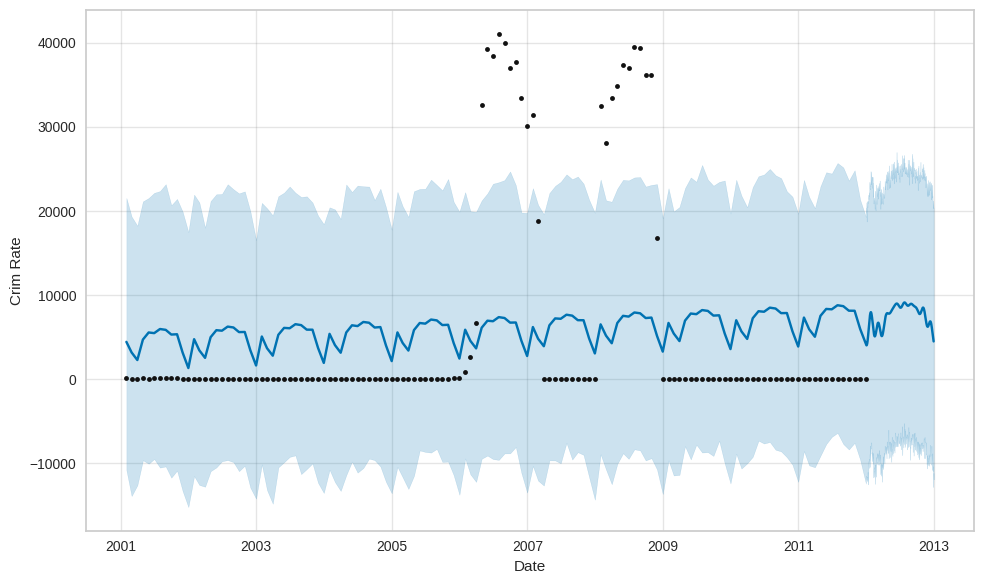

In [206]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crim Rate')

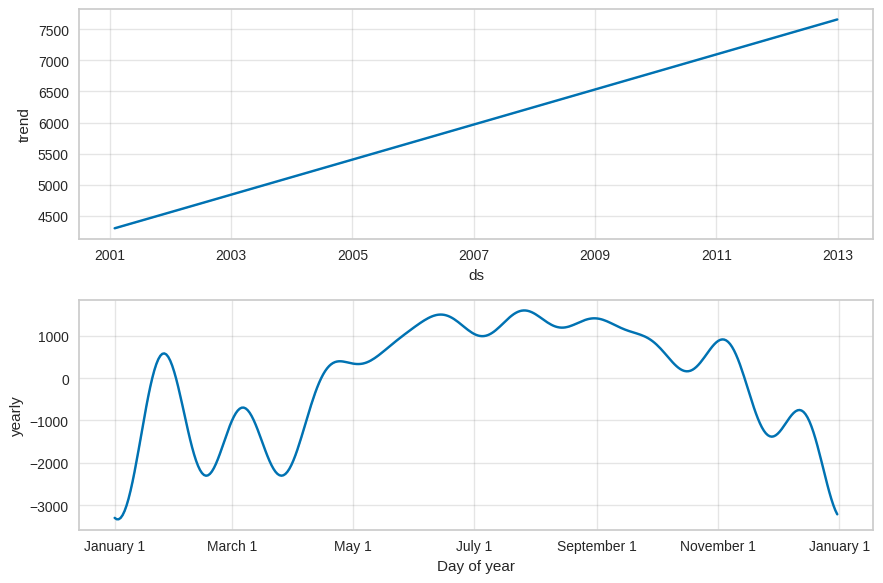

In [207]:
figure = m.plot_components(forcast)

In [208]:
future = m.make_future_dataframe(periods=720)
forcast = m.predict(future)
forcast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2001-01-31,4301.992,-11417.856,20160.524,4301.992,4301.992,149.203,149.203,149.203,149.203,149.203,149.203,0.000,0.000,0.000,4451.195
1,2001-02-28,4323.391,-12371.261,19448.649,4323.391,4323.391,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,-1126.920,0.000,0.000,0.000,3196.471
2,2001-03-31,4347.083,-13385.227,17107.590,4347.083,4347.083,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,-2054.095,0.000,0.000,0.000,2292.988
3,2001-04-30,4370.011,-10912.947,21789.656,4370.011,4370.011,354.141,354.141,354.141,354.141,354.141,354.141,0.000,0.000,0.000,4724.152
4,2001-05-31,4393.703,-9803.493,21586.350,4393.703,4393.703,1173.530,1173.530,1173.530,1173.530,1173.530,1173.530,0.000,0.000,0.000,5567.233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
847,2013-12-16,7925.575,-10083.610,24155.896,7925.206,7925.966,-927.450,-927.450,-927.450,-927.450,-927.450,-927.450,0.000,0.000,0.000,6998.125
848,2013-12-17,7926.346,-9370.251,24076.796,7925.976,7926.737,-1024.323,-1024.323,-1024.323,-1024.323,-1024.323,-1024.323,0.000,0.000,0.000,6902.023
849,2013-12-18,7927.116,-11191.027,22913.091,7926.746,7927.509,-1141.504,-1141.504,-1141.504,-1141.504,-1141.504,-1141.504,0.000,0.000,0.000,6785.612
850,2013-12-19,7927.887,-9264.999,22141.788,7927.516,7928.280,-1277.466,-1277.466,-1277.466,-1277.466,-1277.466,-1277.466,0.000,0.000,0.000,6650.421


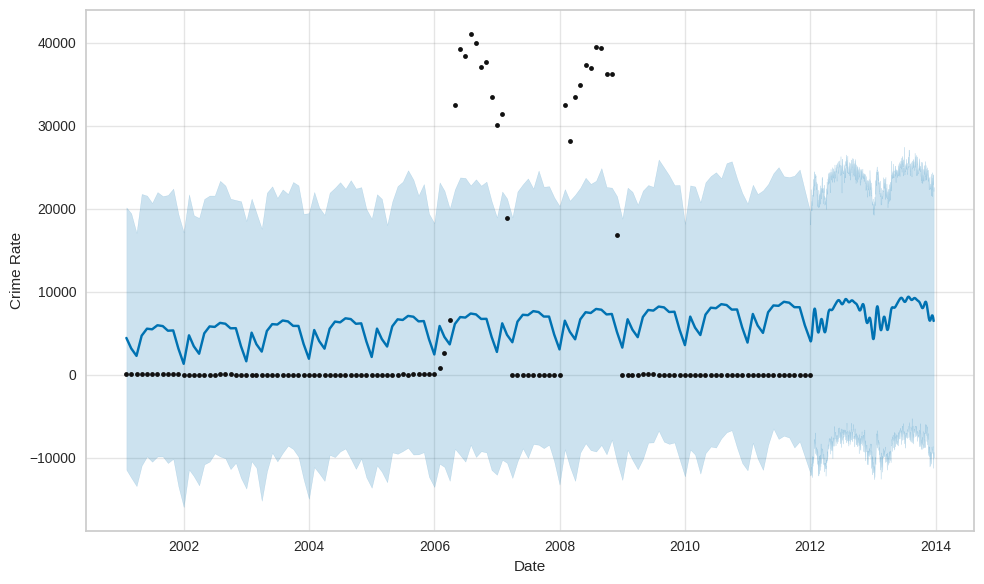

In [209]:
figure = m.plot(forcast,xlabel='Date',ylabel='Crime Rate')

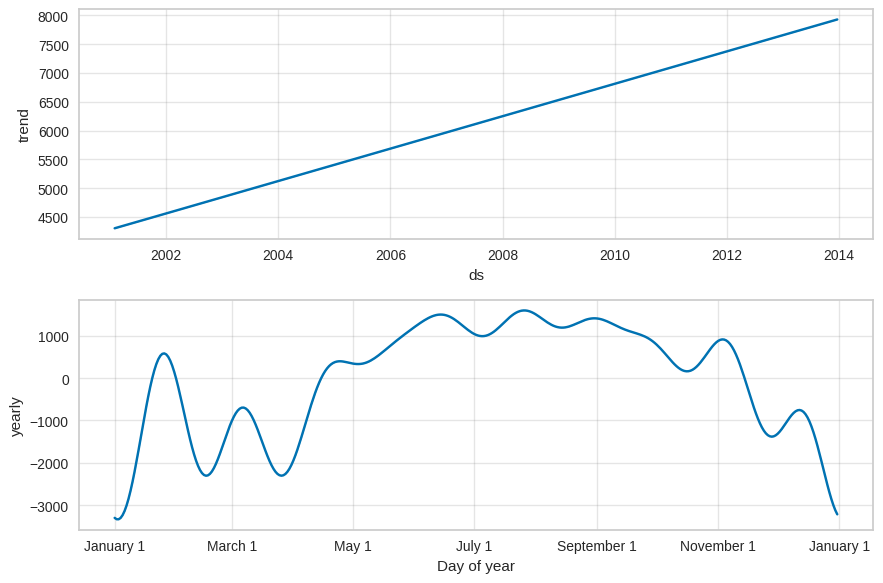

In [210]:
figure = m.plot_components(forcast)